<a href="https://colab.research.google.com/github/dhruvi-05/ebola_outbreaks/blob/main/ebola_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
filepath = '/content/train_data.xlsx - Sheet1.csv'

In [ ]:

import pandas as pd

filepath = '/content/train_data.xlsx - Sheet1.csv'
df = pd.read_csv(filepath)
print(df.shape)
# Remove rows where 'Lat' or 'Long_' is empty or NaN
df = df.dropna(subset=['Lat', 'Long_'])

# Reset index after removing rows
df = df.reset_index(drop=True)

# Now you can work with the cleaned DataFrame 'df'
df

(4016, 4)


,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
3920,31.952200,35.233200,NaN,0.811686
3921,39.904200,116.407400,0.0,0.000000
3922,15.552727,48.516388,NaN,18.074508
3923,-13.133897,27.849332,NaN,1.201603


In [ ]:
df.shape

(3925, 4)

In [ ]:
df = df[df['Case_Fatality_Ratio'] <= 100]
df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
3920,31.952200,35.233200,NaN,0.811686
3921,39.904200,116.407400,0.0,0.000000
3922,15.552727,48.516388,NaN,18.074508
3923,-13.133897,27.849332,NaN,1.201603


In [ ]:
df['Deaths'].isnull().sum()

1545

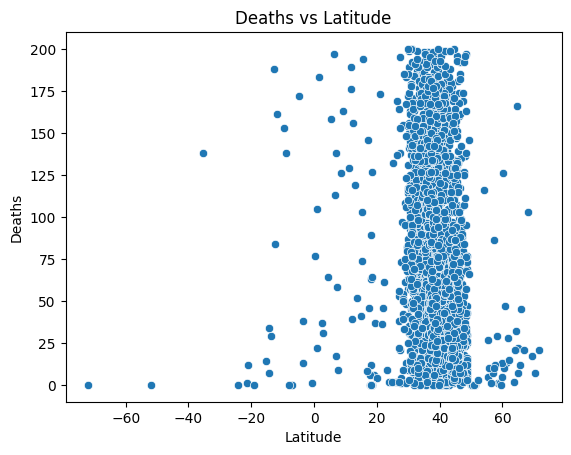

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['Lat'], y=df['Deaths'])
plt.title('Deaths vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.show()


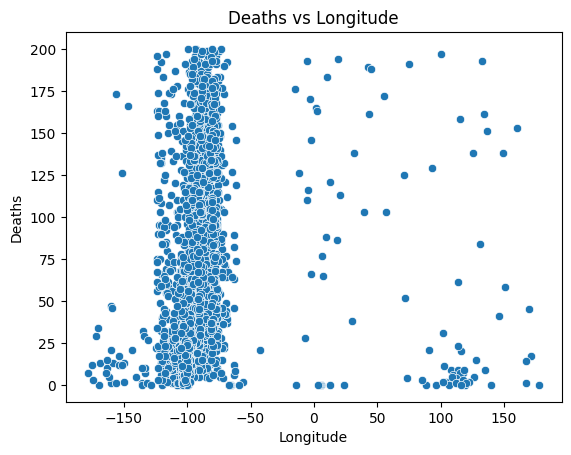

In [ ]:
sns.scatterplot(x=df['Long_'], y=df['Deaths'])
plt.title('Deaths vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Deaths')
plt.show()

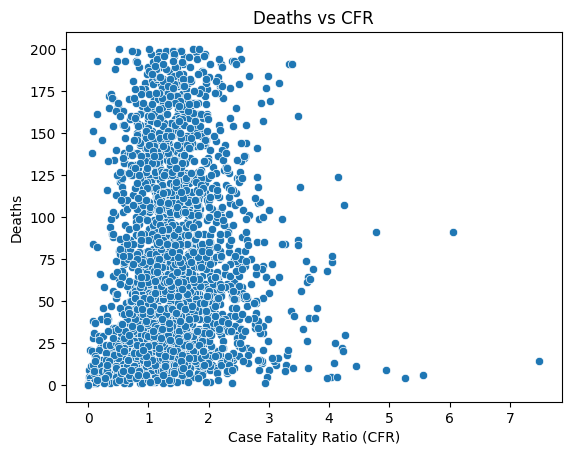

In [ ]:
sns.scatterplot(x=df['Case_Fatality_Ratio'], y=df['Deaths'])
plt.title('Deaths vs CFR')
plt.xlabel('Case Fatality Ratio (CFR)')
plt.ylabel('Deaths')
plt.show()


Correlation between Deaths and Latitude: -0.010343043666829286
Correlation between Deaths and Longitude: 0.0025494292566077


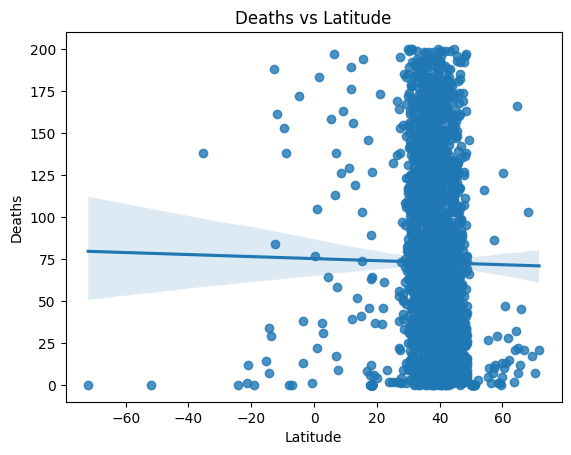

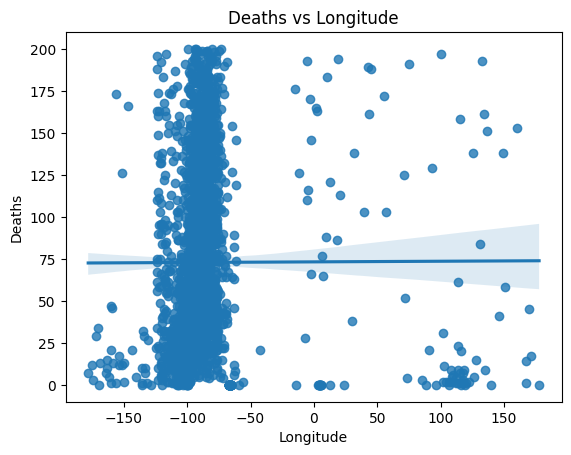

In [ ]:

data = df
data = data.dropna(subset=['Lat', 'Long_', 'Deaths'])

# Reset index after removing rows
data = data.reset_index(drop=True)

# Filter out unrealistic Case_Fatality_Ratio values (above 100%)
data = data[data['Case_Fatality_Ratio'] <= 100]

# Calculate the correlation between 'Deaths' and 'Lat'
correlation_lat = data['Deaths'].corr(data['Lat'])
print(f"Correlation between Deaths and Latitude: {correlation_lat}")

# Calculate the correlation between 'Deaths' and 'Long_'
correlation_long = data['Deaths'].corr(data['Long_'])
print(f"Correlation between Deaths and Longitude: {correlation_long}")


# Visualize the relationships using scatter plots with regression lines
sns.regplot(x=data['Lat'], y=data['Deaths'])
plt.title('Deaths vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Deaths')
plt.show()

sns.regplot(x=data['Long_'], y=data['Deaths'])
plt.title('Deaths vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Deaths')
plt.show()

In [ ]:
df['Deaths'].isnull().sum()

1545

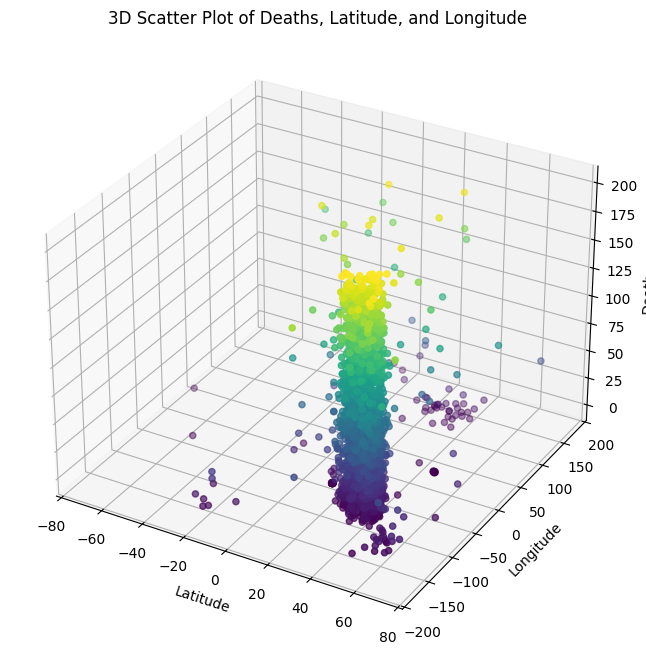

In [ ]:
# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Deaths, Latitude, and Longitude
ax.scatter(df['Lat'], df['Long_'], df['Deaths'], c=df['Deaths'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Deaths')
ax.set_title('3D Scatter Plot of Deaths, Latitude, and Longitude')

# Display the plot
plt.show()

In [ ]:


# Calculate the correlation between 'Deaths' and 'Lat'
correlation_lat = df['Deaths'].corr(df['Lat'])
print(f"Correlation between Deaths and Latitude: {correlation_lat}")

# Calculate the correlation between 'Deaths' and 'Long_'
correlation_long = df['Deaths'].corr(df['Long_'])
print(f"Correlation between Deaths and Longitude: {correlation_long}")

Correlation between Deaths and Latitude: -0.010343043666829286
Correlation between Deaths and Longitude: 0.0025494292566077


In [ ]:
from sklearn.impute import KNNImputer

# Select relevant columns
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
df[['Lat', 'Long_', 'Deaths']] = imputer.fit_transform(df[['Lat', 'Long_', 'Deaths']])


<ipython-input-17-8bd67ea7c0b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Lat', 'Long_', 'Deaths']] = imputer.fit_transform(df[['Lat', 'Long_', 'Deaths']])


In [ ]:
df['Deaths']


,Deaths
0,64.6
1,72.0
2,140.6
3,165.0
4,109.8
...,...
3920,124.8
3921,0.0
3922,130.8
3923,127.6


In [ ]:
df['Deaths'].isnull().sum()

0

In [ ]:

import pandas as pd
import numpy as np

# Calculate 'Confirmed' column
df['Confirmed'] = (df['Deaths'] / df['Case_Fatality_Ratio']) * 100

# Round to the ceiling for non-integer values
df['Confirmed'] = np.ceil(df['Confirmed'])

# Display the updated DataFrame (optional)
df

<ipython-input-20-1bb297c80863>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Confirmed'] = (df['Deaths'] / df['Case_Fatality_Ratio']) * 100
<ipython-input-20-1bb297c80863>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Confirmed'] = np.ceil(df['Confirmed'])


,Lat,Long_,Deaths,Case_Fatality_Ratio,Confirmed
0,33.939110,67.709953,64.6,3.779217,1710.0
1,41.153300,20.168300,72.0,1.077234,6684.0
2,28.033900,1.659600,140.6,2.536905,5543.0
3,42.506300,1.521800,165.0,0.345543,47752.0
4,-11.202700,17.873900,109.8,1.836434,5979.0
...,...,...,...,...,...
3920,31.952200,35.233200,124.8,0.811686,15376.0
3921,39.904200,116.407400,0.0,0.000000,NaN
3922,15.552727,48.516388,130.8,18.074508,724.0
3923,-13.133897,27.849332,127.6,1.201603,10620.0


In [ ]:
df.head(10)

,Lat,Long_,Deaths,Case_Fatality_Ratio,Confirmed
0,33.93911,67.709953,64.6,3.779217,1710.0
1,41.15330,20.168300,72.0,1.077234,6684.0
2,28.03390,1.659600,140.6,2.536905,5543.0
3,42.50630,1.521800,165.0,0.345543,47752.0
4,-11.20270,17.873900,109.8,1.836434,5979.0
5,-71.94990,23.347000,0.0,0.000000,NaN
6,17.06080,-61.796400,146.0,1.603338,9107.0
7,-38.41610,-63.616700,45.6,1.306453,3491.0
8,40.06910,45.038200,142.2,1.954365,7277.0
9,-35.47350,149.012400,138.0,0.061360,224902.0


In [ ]:
# Replace NaN values in 'Confirmed' with 0
df['Confirmed'].fillna(0, inplace=True)



<ipython-input-22-be82678cf95d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Confirmed'].fillna(0, inplace=True)
<ipython-input-22-be82678cf95d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Confirmed'].fillna(0, inplace=True)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Select numerical columns for scaling (exclude non-numerical columns)
numerical_cols = ['Lat', 'Long_', 'Deaths', 'Confirmed', 'Case_Fatality_Ratio']  # Add other numerical columns if needed
df_numerical = df[numerical_cols]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Replace infinite values with NaN
df_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fit and transform the numerical data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Concatenate scaled numerical data with other columns
df_standardized = pd.concat([df_scaled, df.drop(columns=numerical_cols)], axis=1)

# Now 'df_standardized' contains your standardized dataset
df_standardized

,Lat,Long_,Deaths,Confirmed,Case_Fatality_Ratio
0,0.737097,0.690172,0.323,0.007603,0.209091
1,0.787315,0.556696,0.360,0.029720,0.059600
2,0.695991,0.504732,0.703,0.024646,0.140358
3,0.796734,0.504345,0.825,0.212324,0.019118
4,0.422863,0.550254,0.549,0.026585,0.101604
...,...,...,...,...,...
3920,NaN,NaN,NaN,NaN,NaN
3921,NaN,NaN,NaN,NaN,NaN
3922,NaN,NaN,NaN,NaN,NaN
3923,NaN,NaN,NaN,NaN,NaN


In [ ]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling (exclude non-numerical columns)
numerical_cols = ['Lat', 'Long_', 'Deaths', 'Confirmed', 'Case_Fatality_Ratio']  # Add other numerical columns if needed
df_numerical = df[numerical_cols]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Replace infinite values with NaN and then with a large number or the maximum value in the column
df_numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
# Option 1: Replace with a large number
# large_number = 1e10  # Or any other suitable large number
# df_numerical.fillna(large_number, inplace=True)

# Option 2: Replace with the maximum value in the column
# For each numerical column
for col in numerical_cols:
  # Calculate the maximum value excluding infinite values
  max_val = df_numerical[col][np.isfinite(df_numerical[col])].max()

  # Replace infinite and NaN values with the maximum value
  df_numerical[col].replace([np.inf, -np.inf, np.nan], max_val, inplace=True)

# Fit and transform the numerical data
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Concatenate scaled numerical data with other columns
df_standardized = pd.concat([df_scaled, df.drop(columns=numerical_cols)], axis=1)

# Now 'df_standardized' contains your standardized dataset
df_standardized

<ipython-input-24-178ee8b89353>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_numerical[col].replace([np.inf, -np.inf, np.nan], max_val, inplace=True)


,Lat,Long_,Deaths,Confirmed,Case_Fatality_Ratio
0,0.737097,0.690172,0.323,0.007603,0.209091
1,0.787315,0.556696,0.360,0.029720,0.059600
2,0.695991,0.504732,0.703,0.024646,0.140358
3,0.796734,0.504345,0.825,0.212324,0.019118
4,0.422863,0.550254,0.549,0.026585,0.101604
...,...,...,...,...,...
3920,NaN,NaN,NaN,NaN,NaN
3921,NaN,NaN,NaN,NaN,NaN
3922,NaN,NaN,NaN,NaN,NaN
3923,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Lat,0
Long_,0
Deaths,0
Case_Fatality_Ratio,0
Confirmed,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
X = df.drop(['Deaths', 'Case_Fatality_Ratio', 'Confirmed'], axis=1)  # Remove 'Deaths' and 'Case_Fatality_Ratio' from features
y_deaths = df['Deaths']
y_confirmed = df['Confirmed']

# Split data into training and testing sets for 'Deaths'
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(
    X, y_deaths, test_size=0.2, random_state=42
)

# Split data into training and testing sets for 'Confirmed'
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(
    X, y_confirmed, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Random Forest model for 'Deaths'
rf_deaths = RandomForestRegressor(n_estimators=100, random_state=42)
rf_deaths.fit(X_train_deaths, y_train_deaths)

# Make predictions for 'Deaths'
y_pred_deaths = rf_deaths.predict(X_test_deaths)

# Evaluate the model for 'Deaths' using RMSE
rmse_deaths = np.sqrt(mean_squared_error(y_test_deaths, y_pred_deaths))  # Calculate RMSE
r2_deaths = r2_score(y_test_deaths, y_pred_deaths)

print(f"Random Forest (Deaths):")
print(f"Root Mean Squared Error: {rmse_deaths}")  # Print RMSE
print(f"R-squared: {r2_deaths}")

# Replace infinite or very large values in y_train_confirmed with a finite value
y_train_confirmed.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf with NaN
y_train_confirmed = y_train_confirmed.fillna(y_train_confirmed.max())

# Initialize and train the Random Forest model for 'Confirmed'
rf_confirmed = RandomForestRegressor(n_estimators=100, random_state=42)
rf_confirmed.fit(X_train_confirmed, y_train_confirmed)

# Make predictions for 'Confirmed'
y_pred_confirmed = rf_confirmed.predict(X_test_confirmed)

# Evaluate the model for 'Confirmed' using RMSE
rmse_confirmed = np.sqrt(mean_squared_error(y_test_confirmed, y_pred_confirmed))  # Calculate RMSE
r2_confirmed = r2_score(y_test_confirmed, y_pred_confirmed)

print(f"\nRandom Forest (Confirmed):")
print(f"Root Mean Squared Error: {rmse_confirmed}")  # Print RMSE
print(f"R-squared: {r2_confirmed}")

Random Forest (Deaths):
Root Mean Squared Error: 34.106883080985284
R-squared: 0.508515175969849

Random Forest (Confirmed):
Root Mean Squared Error: 10219.878377241783
R-squared: 0.370554995749943


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression

# ... (Your existing code)

# Initialize models
rf_deaths = RandomForestRegressor(n_estimators=100, random_state=42)
gb_deaths = GradientBoostingRegressor(n_estimators=100, random_state=42)
ada_deaths = AdaBoostRegressor(n_estimators=100, random_state=42)


# Fit models for 'Deaths'
rf_deaths.fit(X_train_deaths, y_train_deaths)
gb_deaths.fit(X_train_deaths, y_train_deaths)
ada_deaths.fit(X_train_deaths, y_train_deaths)



# Predict with each model for 'Deaths'
y_pred_rf_deaths = rf_deaths.predict(X_test_deaths)
y_pred_gb_deaths = gb_deaths.predict(X_test_deaths)
y_pred_ada_deaths = ada_deaths.predict(X_test_deaths)


# Ensemble predictions for 'Deaths' (simple averaging)
y_pred_ensemble_deaths = (y_pred_rf_deaths + y_pred_gb_deaths + y_pred_ada_deaths) / 3

# Evaluate the ensemble for 'Deaths'
mse_ensemble_deaths = mean_squared_error(y_test_deaths, y_pred_ensemble_deaths)
r2_ensemble_deaths = r2_score(y_test_deaths, y_pred_ensemble_deaths)

print(f"\nEnsemble (Deaths):")
print(f"Mean Squared Error: {mse_ensemble_deaths}")
print(f"R-squared: {r2_ensemble_deaths}")


# Initialize models for 'Confirmed'
rf_confirmed = RandomForestRegressor(n_estimators=100, random_state=42)
gb_confirmed = GradientBoostingRegressor(n_estimators=100, random_state=42)
ada_confirmed = AdaBoostRegressor(n_estimators=100, random_state=42)
lr_confirmed = LinearRegression() # Initialize Linear Regression model


# Fit models for 'Confirmed'
rf_confirmed.fit(X_train_confirmed, y_train_confirmed)
gb_confirmed.fit(X_train_confirmed, y_train_confirmed)
ada_confirmed.fit(X_train_confirmed, y_train_confirmed)
lr_confirmed.fit(X_train_confirmed, y_train_confirmed) # Train Linear Regression model


# Predict with each model
y_pred_rf_confirmed = rf_confirmed.predict(X_test_confirmed)
y_pred_gb_confirmed = gb_confirmed.predict(X_test_confirmed)
y_pred_ada_confirmed = ada_confirmed.predict(X_test_confirmed)
y_pred_lr_confirmed = lr_confirmed.predict(X_test_confirmed) # Predict using Linear Regression


# Ensemble predictions for 'Confirmed'
y_pred_ensemble_confirmed = (y_pred_rf_confirmed + y_pred_gb_confirmed + y_pred_ada_confirmed + y_pred_lr_confirmed) / 4 # Divide by 4 to average 4 models

# Evaluate the ensemble for 'Confirmed'
mse_ensemble_confirmed = mean_squared_error(y_test_confirmed, y_pred_ensemble_confirmed)
r2_ensemble_confirmed = r2_score(y_test_confirmed, y_pred_ensemble_confirmed)

print(f"\nEnsemble (Confirmed):")
print(f"Mean Squared Error: {mse_ensemble_confirmed}")
print(f"R-squared: {r2_ensemble_confirmed}")


Ensemble (Deaths):
Mean Squared Error: 1226.327680582609
R-squared: 0.481877349317428

Ensemble (Confirmed):
Mean Squared Error: 115938187.58299275
R-squared: 0.3012966218664138


In [ ]:
# prompt: use neural networks

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and y_deaths, y_confirmed are defined from previous code

# Define the neural network model
def create_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error and Mean Absolute Error
    return model

# Split data into training and testing sets
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(
    X, y_deaths, test_size=0.2, random_state=42
)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(
    X, y_confirmed, test_size=0.2, random_state=42
)

# Ensure X is a NumPy array
X_train_deaths = np.array(X_train_deaths)
X_test_deaths = np.array(X_test_deaths)
X_train_confirmed = np.array(X_train_confirmed)
X_test_confirmed = np.array(X_test_confirmed)


# Create and train the model for 'Deaths'
input_shape = (X_train_deaths.shape[1],)  # Input shape for the model
model_deaths = create_model(input_shape)
model_deaths.fit(X_train_deaths, y_train_deaths, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch size

# Make predictions for 'Deaths'
y_pred_deaths = model_deaths.predict(X_test_deaths)

# Evaluate the model for 'Deaths'
mse_deaths = mean_squared_error(y_test_deaths, y_pred_deaths)
r2_deaths = r2_score(y_test_deaths, y_pred_deaths)
print("Neural Network (Deaths):")
print(f"Mean Squared Error: {mse_deaths}")
print(f"R-squared: {r2_deaths}")


# Create and train the model for 'Confirmed'
input_shape = (X_train_confirmed.shape[1],)
model_confirmed = create_model(input_shape)
model_confirmed.fit(X_train_confirmed, y_train_confirmed, epochs=100, batch_size=32, verbose=0)

# Make predictions for 'Confirmed'
y_pred_confirmed = model_confirmed.predict(X_test_confirmed)

# Evaluate the model for 'Confirmed'
mse_confirmed = mean_squared_error(y_test_confirmed, y_pred_confirmed)
r2_confirmed = r2_score(y_test_confirmed, y_pred_confirmed)
print("\nNeural Network (Confirmed):")
print(f"Mean Squared Error: {mse_confirmed}")
print(f"R-squared: {r2_confirmed}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network (Deaths):
Mean Squared Error: 1896.5932655178979
R-squared: 0.19869057385217126


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ValueError: Input contains NaN.

In [ ]:
Test_set_filepath = '/content/test_points.xlsx - Sheet1.csv'
df_test = pd.read_csv(Test_set_filepath)

In [ ]:
df_test

,Lat,Long_
0,41.153300,20.168300
1,-71.949900,23.347000
2,-35.473500,149.012400
3,-34.928500,138.600700
4,47.516200,14.550100
...,...,...
999,49.213800,-2.135800
1000,-7.946700,-14.355900
1001,52.130700,-3.783700
1002,6.423800,-66.589700


In [ ]:
df_test = df_test.dropna()
df_test

,Lat,Long_
0,41.153300,20.168300
1,-71.949900,23.347000
2,-35.473500,149.012400
3,-34.928500,138.600700
4,47.516200,14.550100
...,...,...
999,49.213800,-2.135800
1000,-7.946700,-14.355900
1001,52.130700,-3.783700
1002,6.423800,-66.589700


In [ ]:
# prompt: predict Deaths and Confirmed using RandomForestRegressor from the df_test

# Predict 'Deaths' using the trained RandomForestRegressor model
deaths_predictions = rf_deaths.predict(df_test)

# Predict 'Confirmed' using the trained RandomForestRegressor model
confirmed_predictions = rf_confirmed.predict(df_test)

# Print or use the predictions
print("Deaths Predictions:", deaths_predictions)
print("Confirmed Predictions:", confirmed_predictions)


Deaths Predictions: [ 71.312  53.614 121.42  106.136  65.148  29.17    0.      0.    154.83
 125.818  46.008  38.644  43.258  44.096  44.55   44.788 119.214  60.356
  83.092  24.732  99.976  67.922 123.13   54.044  45.678  45.6    53.836
  14.62   16.16    8.422   5.672   7.434   1.854   4.08    7.632   2.974
  78.982  53.4    72.992  45.746  75.824  72.354  55.798  71.898 125.356
  58.212  46.58  163.474 127.16   59.61   60.03   80.782  63.18   45.38
  33.958   8.932  19.984  36.206  97.114  17.662  51.04    9.482  25.922
  67.682  60.268  51.912  27.678  73.594  41.344  62.392 121.484  57.84
  58.11   67.286  48.184  65.314  92.624  96.04  102.    103.158 101.04
 101.99  102.02  102.     44.72  100.98   91.8   102.    101.8   134.214
  71.656  59.876 108.5   108.564 105.294 101.404 111.322 147.066  93.966
  59.624  53.15   53.234  62.136 111.942  83.028  67.292  72.    148.492
  37.1     0.712   1.424   0.656   0.656  52.582  71.312  75.118  68.802
  95.846  53.322  79.952  65.334  7

In [ ]:
# prompt: ceil deaths_predictions and confirmed_predictions and then calculate Case_Fatality_Ratio of the predictions

# Ceil the predictions
deaths_predictions = np.ceil(deaths_predictions)
confirmed_predictions = np.ceil(confirmed_predictions)

# Calculate Case_Fatality_Ratio
# Avoid division by zero
confirmed_predictions[confirmed_predictions == 0] = 1e-6  # Replace zeros with a small value
case_fatality_ratio_predictions = (deaths_predictions / confirmed_predictions) * 100

print("Ceiled Deaths Predictions:", deaths_predictions)
print("Ceiled Confirmed Predictions:", confirmed_predictions)
print("Case Fatality Ratio Predictions:", case_fatality_ratio_predictions)


Ceiled Deaths Predictions: [ 72.  54. 122. 107.  66.  30.   0.   0. 155. 126.  47.  39.  44.  45.
  45.  45. 120.  61.  84.  25. 100.  68. 124.  55.  46.  46.  54.  15.
  17.   9.   6.   8.   2.   5.   8.   3.  79.  54.  73.  46.  76.  73.
  56.  72. 126.  59.  47. 164. 128.  60.  61.  81.  64.  46.  34.   9.
  20.  37.  98.  18.  52.  10.  26.  68.  61.  52.  28.  74.  42.  63.
 122.  58.  59.  68.  49.  66.  93.  97. 102. 104. 102. 102. 103. 102.
  45. 101.  92. 102. 102. 135.  72.  60. 109. 109. 106. 102. 112. 148.
  94.  60.  54.  54.  63. 112.  84.  68.  72. 149.  38.   1.   2.   1.
   1.  53.  72.  76.  69.  96.  54.  80.  66.  75.  56.  54.  49.  72.
  18.  79.  85. 123. 111.  77.  66. 101.  85.  73.  80. 121.  80.  77.
  61. 124.  80.  80. 125.  80. 115.  28. 124. 103. 155. 140. 147. 137.
 153. 136. 133.  18.  18.  32.  34.  20.  34. 121.  11.  42. 108. 100.
  51. 116. 129.  78. 114.  71. 120. 162.  87. 134. 145. 107.  86. 109.
  57.  58.  28. 125.  20.  23.   9.  44. 106. 124.

In [ ]:
# prompt: make the predictions into 2 seperate col
df_test = df_test.reset_index(drop=True)
predictions_df = predictions_df.reset_index(drop=True)

df_test_with_predictions = pd.concat([df_test, predictions_df], axis=1)
# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Deaths_Predicted': deaths_predictions, 'Confirmed_Predicted': confirmed_predictions})

# Concatenate the predictions with the original test data
df_test_with_predictions = pd.concat([df_test, predictions_df], axis=1)

# Display the combined DataFrame
df_test_with_predictions


,Lat,Long_,Deaths_Predicted,Confirmed_Predicted
0,41.153300,20.168300,72.0,7269.0
1,-71.949900,23.347000,54.0,4739.0
2,-35.473500,149.012400,122.0,166579.0
3,-34.928500,138.600700,107.0,103362.0
4,47.516200,14.550100,66.0,8776.0
...,...,...,...,...
976,49.213800,-2.135800,114.0,50824.0
977,-7.946700,-14.355900,38.0,2358.0
978,52.130700,-3.783700,69.0,12784.0
979,6.423800,-66.589700,49.0,4126.0


In [ ]:
# prompt: combine case_fatality_ratio_predictions  col too

# Assuming you have deaths_predictions and confirmed_predictions from previous code

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({
    'Deaths_Predicted': deaths_predictions,
    'Confirmed_Predicted': confirmed_predictions,
    'Case_Fatality_Ratio_Predicted': case_fatality_ratio_predictions
})

# Concatenate the predictions with the original test data
df_test_with_predictions = pd.concat([df_test, predictions_df], axis=1)

# Display the combined DataFrame
df_test_with_predictions


,Lat,Long_,Deaths_Predicted,Confirmed_Predicted,Case_Fatality_Ratio_Predicted
0,41.153300,20.168300,72.0,7269.0,0.990508
1,-71.949900,23.347000,54.0,4739.0,1.139481
2,-35.473500,149.012400,122.0,166579.0,0.073239
3,-34.928500,138.600700,107.0,103362.0,0.103520
4,47.516200,14.550100,66.0,8776.0,0.752051
...,...,...,...,...,...
976,49.213800,-2.135800,114.0,50824.0,0.224303
977,-7.946700,-14.355900,38.0,2358.0,1.611535
978,52.130700,-3.783700,69.0,12784.0,0.539737
979,6.423800,-66.589700,49.0,4126.0,1.187591


In [ ]:
# prompt: now give code to downlaod the results into an excel or csv file

# Save the DataFrame with predictions to a CSV file
df_test_with_predictions.to_csv('7782.abhineet_Part_1.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('7782.abhineet_Part_1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>